In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

colors = sns.color_palette("husl", 10)

In [2]:
df = pd.read_csv('List of Countries by Sugarcane Production.csv')

In [3]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [4]:
df.shape

(103, 7)

# Data Cleaning

In [5]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [6]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [7]:
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [8]:
df = df.drop( "Unnamed: 0", axis = 1)

In [9]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [10]:
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [11]:
df[df["Acreage(Hectare)"].isnull()]

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [12]:
df = df.dropna().reset_index()

In [13]:
df.head()

,index,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [14]:
df.drop(["index"], axis = 1, inplace = True)

In [15]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [16]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [17]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

In [18]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [19]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

# Univariate Analysis

In [20]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


# How many countries produce sugarcane from each continent?

In [21]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

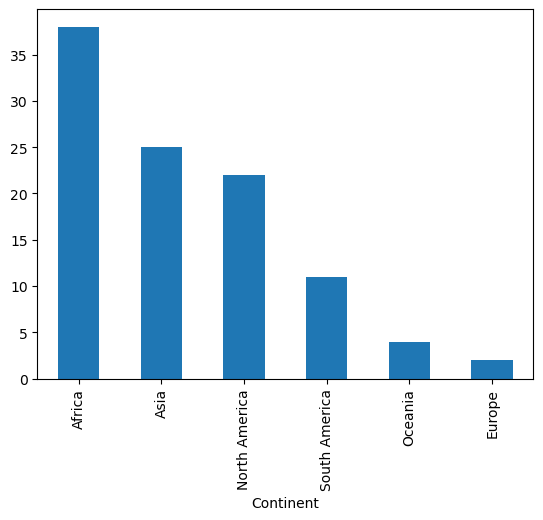

In [22]:
df["Continent"].value_counts().plot(kind = "bar")

Africa has maximum number of countries which produces sugarcane

In [23]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


# Distribution of the columns

C:\Users\aishw\AppData\Local\Temp\ipykernel_8648\456783070.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\aishw\AppData\Local\Temp\ipykernel_8648\456783070.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_person(Kg)"])
C:\Users\aishw\Ap

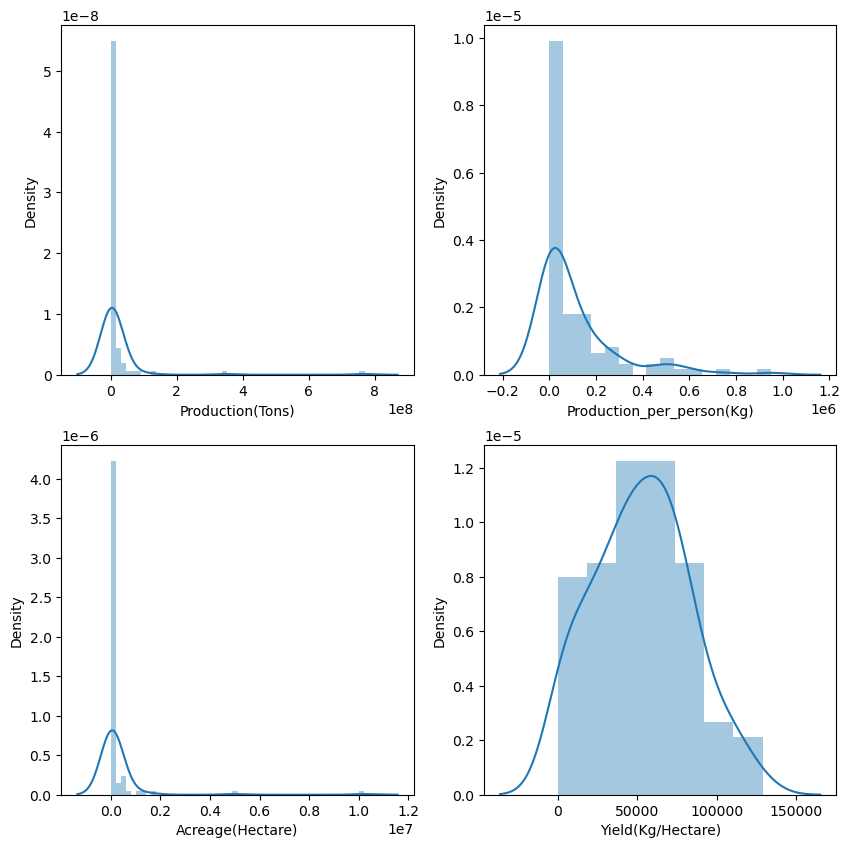

In [24]:
plt.figure(figsize =(10,10))

plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
# plt.title("Production(Tons)")

plt.subplot(2,2,2)
sns.distplot(df["Production_per_person(Kg)"])
# plt.title("Production_per_person(Kg)")

plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
# plt.title("Acreage(Hectare)")

plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])
# plt.title("Yield(Kg/Hectare)")

plt.show()

# Checking outliers

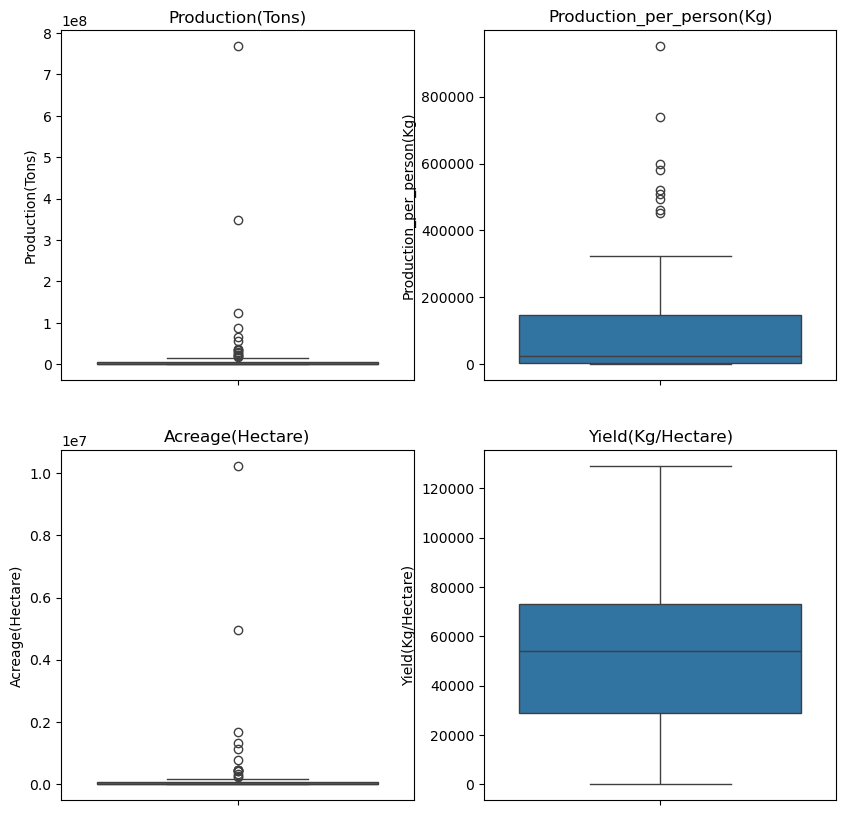

In [25]:
plt.figure(figsize =(10,10))

plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.title("Production(Tons)")

plt.subplot(2,2,2)
sns.boxplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")

plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")

plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")

plt.show()

we have outliers in the data but outliers are required here as it shows the countries which has maximum production. And then we can see what are the reasons for outliers.

In [26]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


# Bivariate Analysis

In [27]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


# Which country produces maximum sugarcane?

In [28]:
df_new = df[["Country", "Production(Tons)"]].set_index("Country")

In [29]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [30]:
df_new["Production(Tons)_percent"] = df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()

In [31]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

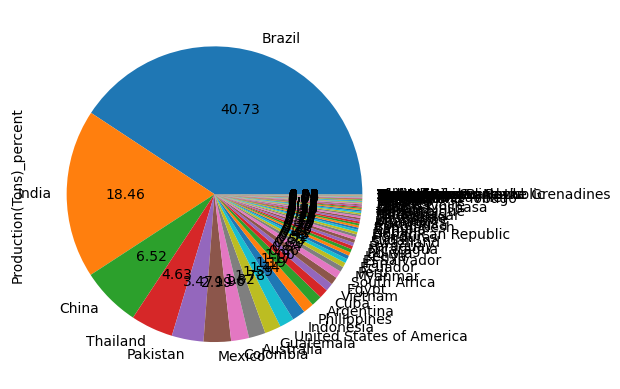

In [32]:
# plotting pie chart for the same

df_new["Production(Tons)_percent"].plot(kind = "pie", autopct = "%.2f")

Brazil, India and China have 65% of production of sugarcane

In [33]:
# df[["Country","Production(Tons)"]].set_index("Country").sort_values("Production(Tons)", ascending = False).head(15).plot(kind = "bar")

<Axes: xlabel='Country'>

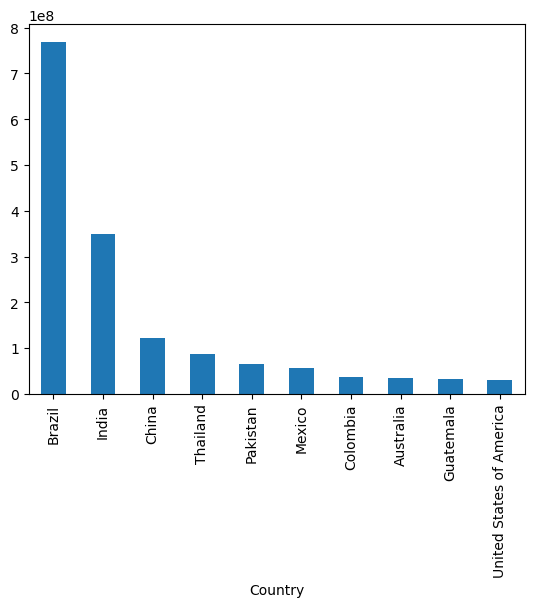

In [34]:
df_new["Production(Tons)"].head(10).plot(kind = "bar")


C:\Users\aishw\AppData\Local\Temp\ipykernel_8648\2463415547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df.head(10), x= "Country", y = "Production(Tons)", palette = colors)
C:\Users\aishw\AppData\Local\Temp\ipykernel_8648\2463415547.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


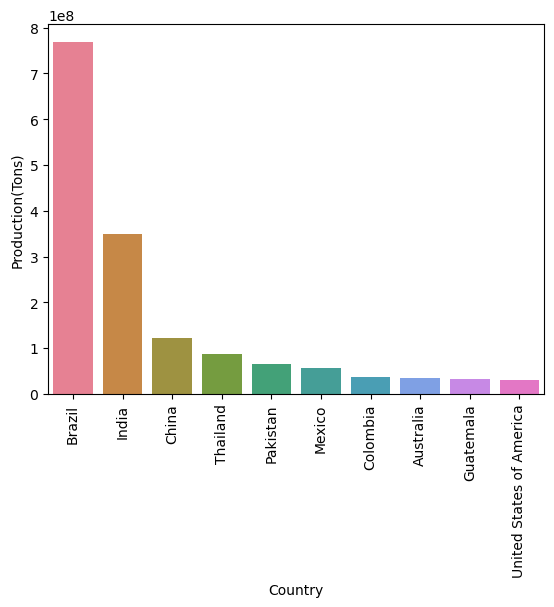

In [38]:
# bar plot using seaborn library 

ax = sns.barplot(data = df.head(10), x= "Country", y = "Production(Tons)", palette = colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

The country "Brazil" produces maximum sugarcane out of all countries.

# Which country has highest land?

In [40]:
df.head(10)

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
5,Mexico,North America,56446821.0,452524.000,781054.0,7227.0
6,Colombia,South America,36951213.0,740075.000,416626.0,88691.5
7,Australia,Oceania,34403004.0,1373.406,447204.0,76929.1
8,Guatemala,North America,33533403.0,1938.114,25985.0,129049.3
9,United States of America,North America,29926210.0,91304.000,37053.0,80766.0


C:\Users\aishw\AppData\Local\Temp\ipykernel_8648\1682269603.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_acr.head(10), x= "Country", y = "Acreage(Hectare)", palette = colors)
C:\Users\aishw\AppData\Local\Temp\ipykernel_8648\1682269603.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


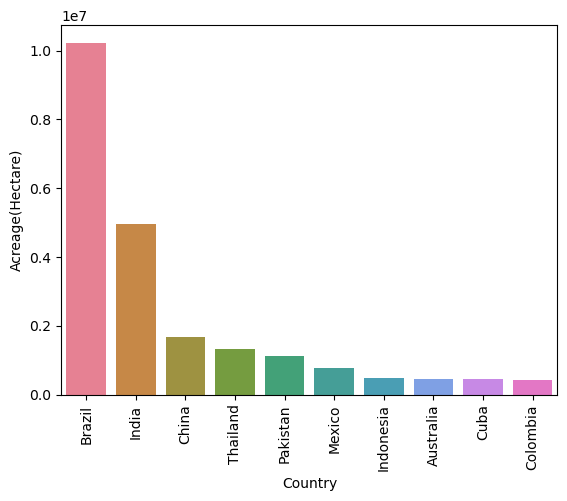

In [44]:
df_acr = df.sort_values("Acreage(Hectare)", ascending = False)
ax = sns.barplot(data = df_acr.head(10), x= "Country", y = "Acreage(Hectare)", palette = colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

# Which country has highest yield per hectare?

C:\Users\aishw\AppData\Local\Temp\ipykernel_8648\3182413940.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_yield.head(10), x= "Country", y = "Yield(Kg/Hectare)", palette = colors)
C:\Users\aishw\AppData\Local\Temp\ipykernel_8648\3182413940.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


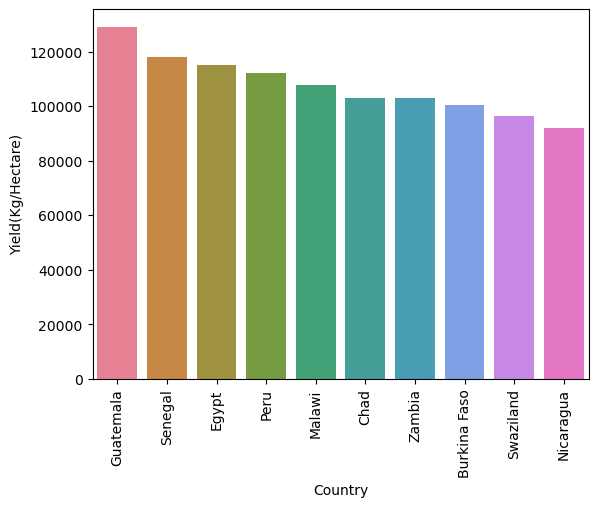

In [48]:
df_yield = df.sort_values("Yield(Kg/Hectare)", ascending = False)
ax = sns.barplot(data = df_yield.head(10), x= "Country", y = "Yield(Kg/Hectare)", palette = colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

Guatemala has the highest yield(kg/hectare)

# Which country has highest production?

C:\Users\aishw\AppData\Local\Temp\ipykernel_8648\1620446354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_prd.head(10), x= "Country", y = "Production_per_person(Kg)", palette = colors)
C:\Users\aishw\AppData\Local\Temp\ipykernel_8648\1620446354.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


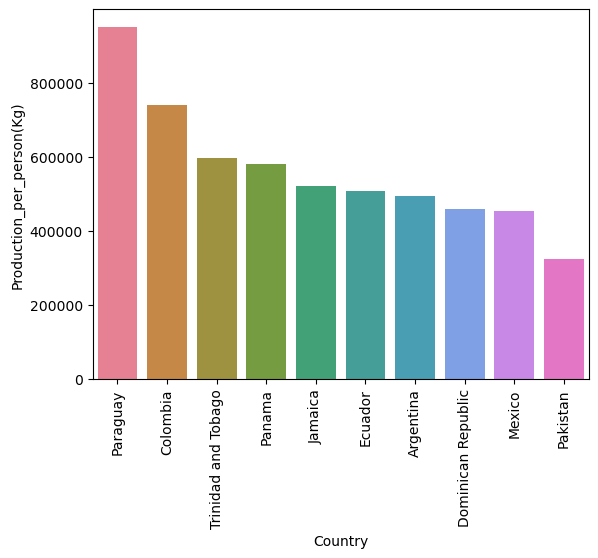

In [49]:
df_prd = df.sort_values("Production_per_person(Kg)", ascending = False)
ax = sns.barplot(data = df_prd.head(10), x= "Country", y = "Production_per_person(Kg)", palette = colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

Production per Person is highest in Paraguay

# Correlation

In [57]:
# df.corr()

In [131]:
df_corr = df.select_dtypes(include='number').corr()
df_corr

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


In [132]:
print("Excluded columns:", df.select_dtypes(exclude='number').columns.tolist())

Excluded columns: ['Country', 'Continent']


<Axes: >

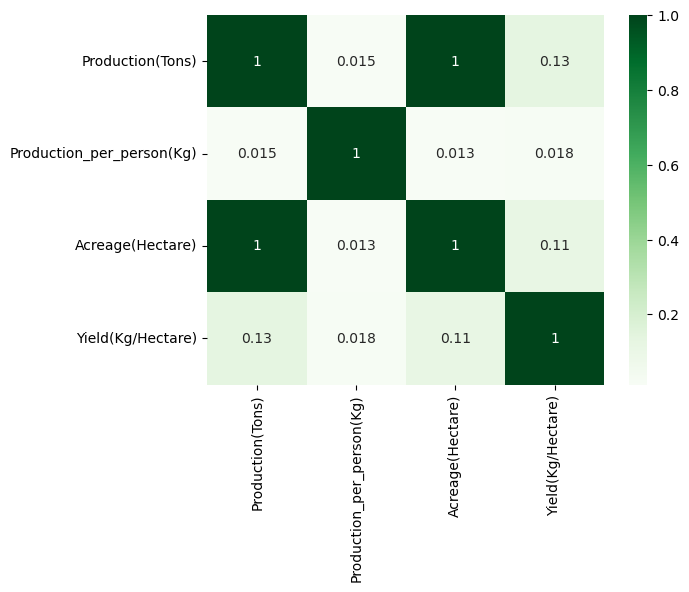

In [133]:
# heatmap of the correlation

sns.heatmap(df_corr, annot = True, cmap = "Greens")

# Do countries with highest land produce more sugarcane?

In [134]:
# if correlation is not found then ->

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

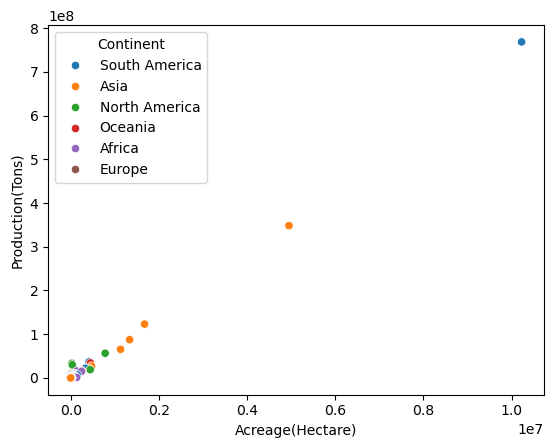

In [135]:
sns.scatterplot(data = df, x= "Acreage(Hectare)", y = "Production(Tons)", hue = "Continent" )

Overall increase in land increases the production

# Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

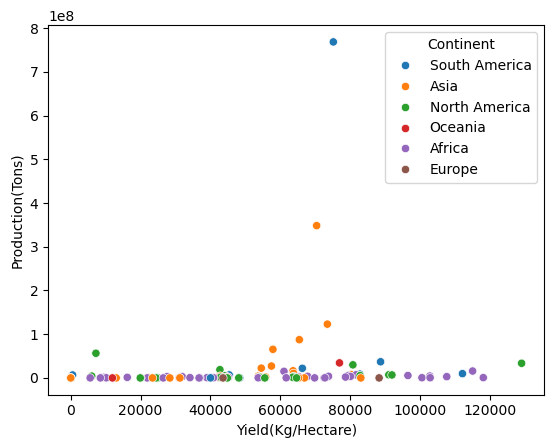

In [136]:
sns.scatterplot(data = df, x= "Yield(Kg/Hectare)", y = "Production(Tons)", hue = "Continent" )

In [137]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


# Analysis for Continent

In [138]:
df_continent = df.groupby("Continent").sum()

In [139]:
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


# Which continent produces maximum sugarcane?

In [140]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

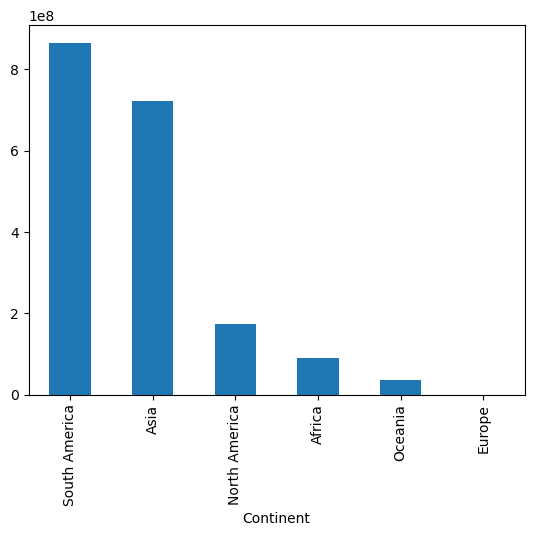

In [141]:
df_continent["Production(Tons)"].sort_values(ascending =False).plot(kind = "bar")

<Axes: xlabel='Continent'>

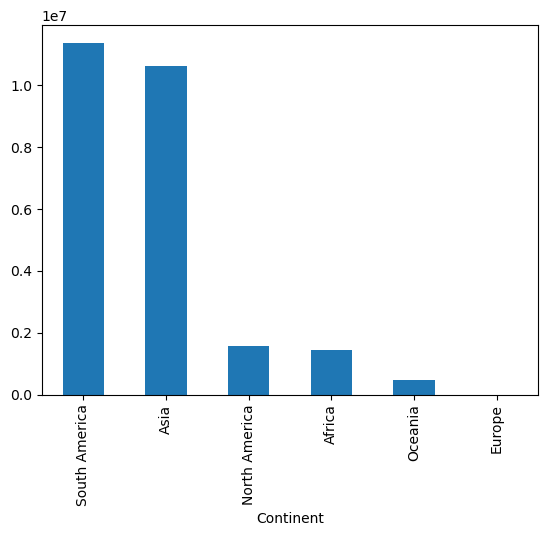

In [142]:
df_continent["Acreage(Hectare)"].sort_values(ascending =False).plot(kind = "bar")

# Do number of countries in a Continent effects production of sugarcane?

NO

In [143]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [144]:
df_continent["number_of_countries"]

Continent
Africa           38
Asia             25
Europe            2
North America    22
Oceania           4
South America    11
Name: number_of_countries, dtype: int64

In [145]:
continent_names = df_continent.index.to_list()

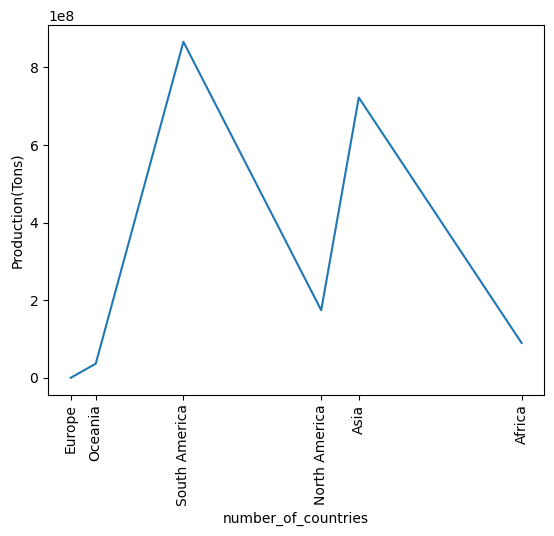

In [146]:
sns.lineplot(data = df_continent, x = "number_of_countries", y = "Production(Tons)")
plt.xticks(df_continent["number_of_countries"], continent_names, rotation = 90)
plt.show()

# Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

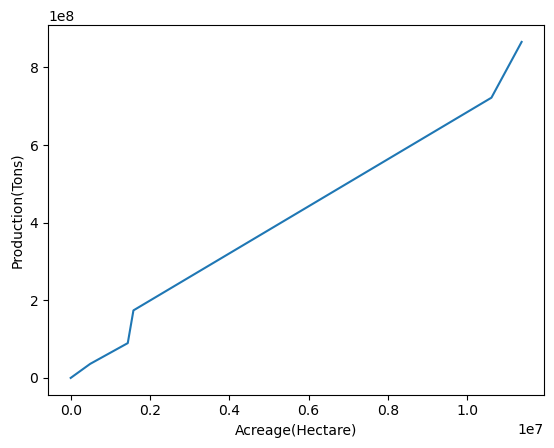

In [147]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )

# Production distribution by continent

<Axes: ylabel='Production(Tons)'>

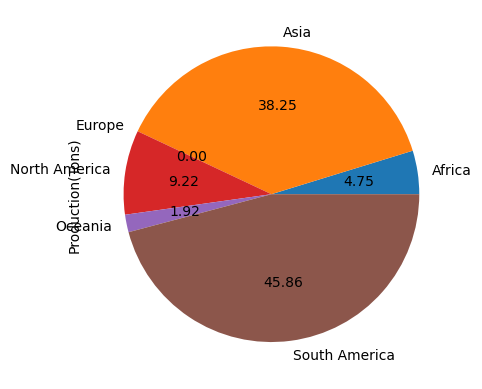

In [153]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f")

# Correlation for continent/

In [151]:
df_continent_corr = df.select_dtypes(include = "number").corr()

In [152]:
df_continent_corr

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000
